In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
from PIL import Image
from model import VGG

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
model_path = 'model/vgg_16.ckpt'
print_tensors_in_checkpoint_file(file_name=model_path, tensor_name=None, all_tensors=False)

vgg_16/mean_rgb (DT_FLOAT) [3]
vgg_16/fc7/weights (DT_FLOAT) [1,1,4096,4096]
vgg_16/fc6/weights (DT_FLOAT) [7,7,512,4096]
vgg_16/conv5/conv5_3/biases (DT_FLOAT) [512]
vgg_16/fc8/weights (DT_FLOAT) [1,1,4096,1000]
vgg_16/conv5/conv5_2/weights (DT_FLOAT) [3,3,512,512]
vgg_16/conv5/conv5_2/biases (DT_FLOAT) [512]
vgg_16/conv5/conv5_1/biases (DT_FLOAT) [512]
vgg_16/conv4/conv4_2/weights (DT_FLOAT) [3,3,512,512]
vgg_16/conv5/conv5_1/weights (DT_FLOAT) [3,3,512,512]
vgg_16/conv4/conv4_2/biases (DT_FLOAT) [512]
vgg_16/conv3/conv3_3/biases (DT_FLOAT) [256]
vgg_16/fc7/biases (DT_FLOAT) [4096]
vgg_16/conv3/conv3_2/weights (DT_FLOAT) [3,3,256,256]
vgg_16/conv4/conv4_3/biases (DT_FLOAT) [512]
vgg_16/conv2/conv2_2/biases (DT_FLOAT) [128]
vgg_16/conv3/conv3_2/biases (DT_FLOAT) [256]
vgg_16/conv2/conv2_1/weights (DT_FLOAT) [3,3,64,128]
vgg_16/conv3/conv3_3/weights (DT_FLOAT) [3,3,256,256]
vgg_16/conv1/conv1_1/biases (DT_FLOAT) [64]
vgg_16/conv2/conv2_2/weights (DT_FLOAT) [3,3,128,128]
vgg_16/conv2/co

(224, 224, 3)

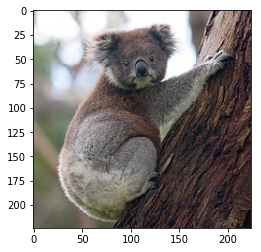

In [3]:
image = np.array(Image.open('data/koala.jpg'))
plt.imshow(image)
image.shape

In [4]:
model = VGG()
saver = tf.train.Saver()

In [5]:
with tf.Session() as sess:
    saver.restore(sess, model_path)
    softmax = sess.run(model.softmax, feed_dict={
        model.x: [image],
    })
softmax.shape

INFO:tensorflow:Restoring parameters from model/vgg_16.ckpt


(1, 1000)

In [6]:
from tensorflow.python.keras._impl.keras.applications import imagenet_utils
imagenet_utils.decode_predictions(softmax)

[[('n01882714', 'koala', 0.9995735),
  ('n02500267', 'indri', 0.00027866015),
  ('n02497673', 'Madagascar_cat', 7.347779e-05),
  ('n02125311', 'cougar', 2.1067206e-05),
  ('n02493509', 'titi', 1.5819574e-05)]]